In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('DSBDALExam DataSets/Iris/Iris.csv')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [2]:
df.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'species']
df.head()

,sepal_len,sepal_width,petal_len,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.shape

(149, 5)

In [4]:
df.isnull().sum()

sepal_len      0
sepal_width    0
petal_len      0
petal_width    0
species        0
dtype: int64

In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.dtypes

sepal_len      float64
sepal_width    float64
petal_len      float64
petal_width    float64
species         object
dtype: object

In [7]:
df.eq('?').sum()

sepal_len      0
sepal_width    0
petal_len      0
petal_width    0
species        0
dtype: int64

<AxesSubplot:xlabel='petal_len'>

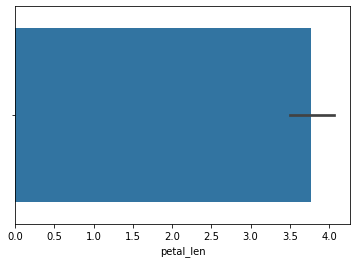

In [9]:
import seaborn as sns
sns.barplot(x=df['petal_len'], data=df)

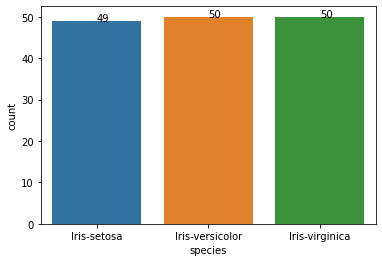

In [16]:
ax = sns.countplot(x=df['species'],data=df)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/2, p.get_height()))


In [17]:
x = df[['petal_len', 'petal_width']]
y = df[['species']].values

In [19]:
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()
y1 = obj.fit_transform(y)
y1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y1, test_size=0.25, random_state=123)
xtrain.shape

(111, 2)

In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

In [26]:
from sklearn import metrics
metrics.r2_score(ytest, y_pred)

-0.0035211267605630425

In [31]:
metrics.accuracy_score(ytest, y_pred)

0.21052631578947367

In [35]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.21      1.00      0.35         8
           2       0.00      0.00      0.00        14

    accuracy                           0.21        38
   macro avg       0.07      0.33      0.12        38
weighted avg       0.04      0.21      0.07        38



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(MultinomialNB(), xtrain,ytrain,cv=5)

array([0.34782609, 0.36363636, 0.36363636, 0.40909091, 0.40909091])

In [ ]:
model.predict([[1, ]])